A Soma dos Quadrados Residuais (SQR) é de 42716


(array([358.,  70.,  33.,  12.,   4.,   5.,   3.,   2.,   2.,  17.]),
 array([1.07625490e-03, 7.54456415e+01, 1.50890207e+02, 2.26334772e+02,
        3.01779337e+02, 3.77223902e+02, 4.52668468e+02, 5.28113033e+02,
        6.03557598e+02, 6.79002163e+02, 7.54446728e+02]),
 <BarContainer object of 10 artists>)

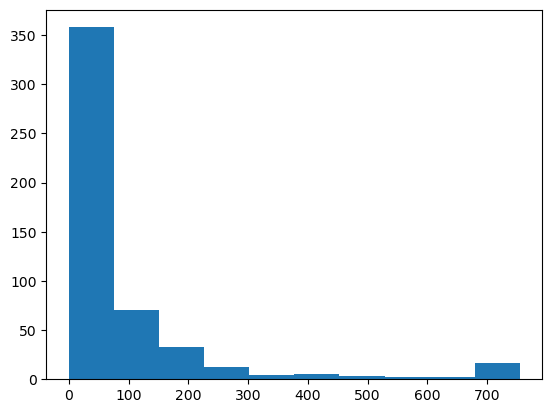

In [24]:
#Definindo o problema de negócio: Prever a taxa média de ocupação de casas na região de Boston, EUA, por proprietários.
#Dataset: Boston Housing Dataset

#Importando pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Carregando o dataset
boston = pd.read_excel('C:/Users/bruno/Machine Learning/datasets/boston_house_prices.xlsx')

#Análise Exploratória
data = pd.DataFrame(data = boston)
data.head(20)

valor_medio_esperado = data['Target'].mean()
valor_medio_esperado

#Calculando o SQR: Levando em conta o Teoria do Limite Central, com a quantidade de registros, minha amostra tende a distribuição normal,
#com meus valores se aproximando da média do conjunto de dados. Com isso, calcularei a Soma dos Quadrados Residuais para verificar a distribuição
#dos meus erros, em que a formula é a somatória dos meus valores da váriavel alvo menos os valores previstos ao quadrado, nesse caso como ainda
#não calculei os valores previstos, usarei a média como esse valor.

erros_quadrado = pd.Series(valor_medio_esperado - data['Target'])**2
SQR = np.sum(erros_quadrado)
print(f"A Soma dos Quadrados Residuais (SQR) é de {SQR:.0f}")

#Histograma dos erros
hist_plot = plt.hist(erros_quadrado)
hist_plot #Grande maioria dos erros são pequenos, ou seja, estão próximos da média, o que indica que os valores estão próximos do "previsto", o que
#pode ser justificado pelo TLC, o que também indica que a variável target está normalmente distribuída


O desvio padrão da variável RM é de 0.7019225143345692


C:\Users\bruno\AppData\Local\Temp\ipykernel_16072\900118493.py:9: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


Correlação entre a variável RM e Target é de: 0.69536


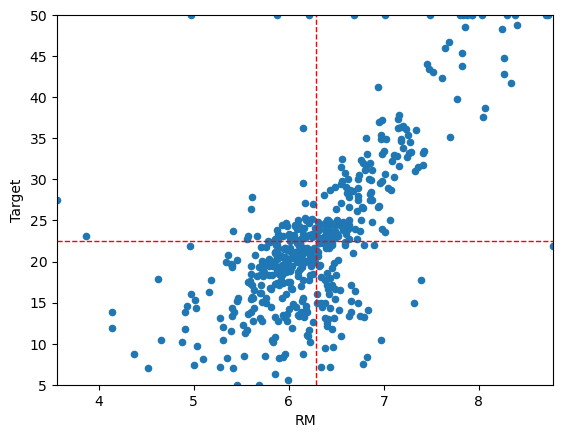

In [26]:
#Regressão Linear Simples: Usarei a variável RM, que é a média de quartos por ocupação, posteriormente utilizarei mais variáveis para compor o modelo
#de regressão multipla

#Primeiramente verificarei se existe relação entre as duas variáveis, irei utilizar o desvio padrão e a correlação entre ambas
desvio_padrao_RM = np.std(data['RM'])
print(f"O desvio padrão da variável RM é de {desvio_padrao_RM}")

#Para calcular a correlação, primeiro vou calcular a covariancia e padronizar as duas variáveis para calcular a correlacao
from scipy.stats.stats import pearsonr
print("Correlação entre a variável RM e Target é de: %0.5f" % pearsonr(data['RM'], data['Target'])[0])
#O valor do Coeficiente de Correlação de Pearson é de quase 0.7, indicando uma correlação positiva entre ambas as variáveis, demonstrando que existe
#uma relação entre ambas

#Ranges dos valores RM e Target
x_range = [data['RM'].min(), data['RM'].max()]
y_range = [data['Target'].min(), data['Target'].max()]

#Gráfico de dispersão
scatter_plot = data.plot(kind = 'scatter', x = 'RM', y = 'Target', xlim = x_range, ylim = y_range)

#Adicionando a média de ambas as variáveis no gráfico
mean_Y = scatter_plot.plot(x_range, [data['Target'].mean(), data['Target'].mean()] , '--', color = 'red', linewidth = 1)
mean_X = scatter_plot.plot([data['RM'].mean(), data['RM'].mean()], y_range, '--', color = 'red', linewidth = 1)


                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           2.49e-74
Time:                        20:15:01   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

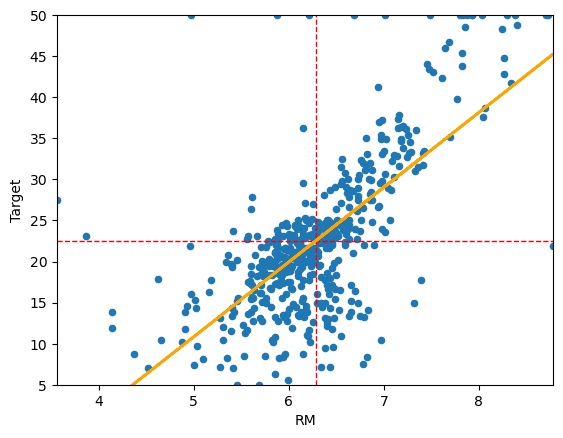

In [28]:
#Utilizando StatsModel
import statsmodels.api as sm

X = data['RM']
Y = data['Target']

X = sm.add_constant(X)

#Criando o modelo
modelo = sm.OLS(Y, X)

#Treinando o modelo
modelo_v1 = modelo.fit()
print(modelo_v1.summary())

#Observações do modelo V1:
# Método utilizado para descobrir os melhores coeficientes: MMQ
#Tanto o R² e o R² ajustado estão bem baixos, portanto a variável RM não explica tão bem ou sozinha não explica o modelo

#Valores dos coeficientes
print(modelo_v1.params)

#Previsões
valores_previstos = modelo_v1.predict(X)
print(valores_previstos)

#Criando gráfico de dispersão + linha da regressão
#Ranges dos valores RM e Target
x_range = [data['RM'].min(), data['RM'].max()]
y_range = [data['Target'].min(), data['Target'].max()]

#Gráfico de dispersão
scatter_plot = data.plot(kind = 'scatter', x = 'RM', y = 'Target', xlim = x_range, ylim = y_range)

#Adicionando a média de ambas as variáveis no gráfico e a linha de regressão
mean_Y = scatter_plot.plot(x_range, [data['Target'].mean(), data['Target'].mean()] , '--', color = 'red', linewidth = 1)
mean_X = scatter_plot.plot([data['RM'].mean(), data['RM'].mean()], y_range, '--', color = 'red', linewidth = 1)
linha_regressao = scatter_plot.plot(data['RM'], valores_previstos, '-', color = 'orange', linewidth = 2)



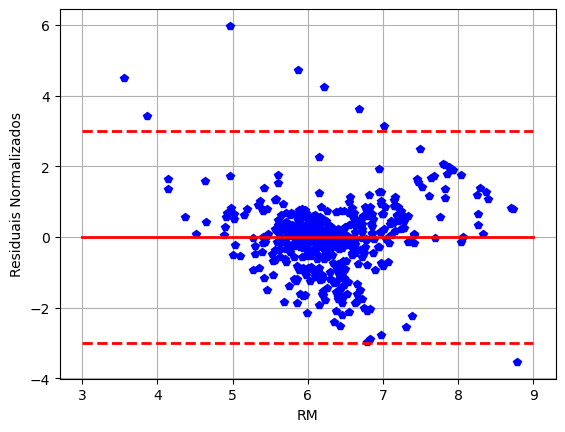

In [30]:
#Uma coisa a observar no gráfico é que há diversos pontos fora da reta de regressão. Um dos suspostos dos modelo de regressão é que a esperança dos erros
#seja zero ou muito próximo de zero, ou seja, os pontos estejam praticamente colados na reta, porém não é o caso desse modelo utilizando a variável RM

#Verificando como está os residuos do modelo
residuais = data['Target'] - valores_previstos
residuais_normalizados = (residuais - np.mean(residuais)) / np.std(residuais)

residual_scatter_plot = plt.plot(data['RM'], residuais_normalizados, 'bp')
plt.xlabel('RM')
plt.ylabel('Residuais Normalizados')
media_residuo = plt.plot([int(x_range[0]), round(x_range[1], 0)], [0,0], '-', color = 'red', linewidth = 2)
upper_bound = plt.plot([int(x_range[0]), round(x_range[1], 0)], [3,3], '--', color = 'red', linewidth = 2)
lower_bound = plt.plot([int(x_range[0]), round(x_range[1], 0)], [-3,-3], '--', color = 'red', linewidth = 2)
plt.grid()

In [32]:
#Criando segundo modelo a partir do Scikit-Learn
from sklearn import linear_model

modelo_v2 = linear_model.LinearRegression(fit_intercept = True)

#Definindo valores de X e Y
numero_obs = len(data)
X = data['RM'].values.reshape((numero_obs, 1)) #Transformando o vetor da variável RM em formato matricial
Y = data['Target'].values

#Treinando o modelo
modelo_v2.fit(X, Y)
print(modelo_v2.coef_)
print(modelo_v2.intercept_)

#Previsões
print(modelo_v2.predict(X))



[9.10210898]
-34.670620776438554
[25.17574577 23.77402099 30.72803225 29.02593787 30.38215211 23.85593997
 20.05125842 21.50759586 16.5833549  19.97844155 23.3735282  20.02395209
 18.93169901 19.47782555 20.81583557 18.43108302 19.35039603 19.85101202
 14.99048582 17.45715736 16.02812625 19.6234593  21.23453259 18.23993873
 19.25027283 16.29208741 18.23993873 20.36983223 24.44757706 26.07685456
 17.32972783 20.59738496 19.48692766 17.22050253 20.81583557 19.33219181
 18.49479778 18.57671676 19.63256141 25.35778795 29.26259271 26.95065703
 21.48028953 21.86257811 20.57007863 17.04756245 17.99418179 20.21509638
 14.47166561 16.31939374 19.60525508 20.98877564 24.5932108  19.92382889
 18.9225969  31.31056723 23.42814085 27.36935404 21.26183891 19.27757916
 17.58458688 19.63256141 24.09259481 26.87784015 29.99076143 22.58164472
 18.0032839  18.83157581 16.24657686 18.89529058 23.73761256 19.58705086
 20.53367019 22.17204981 22.42690886 22.54523628 22.48152152 21.21632837
 22.05372239 18.79

In [37]:
# Definindo X e Y
obs = len(data)
X = data['RM'].values.reshape((obs, 1))
X = np.column_stack((X, np.ones(obs)))
Y = data['Target'].values

# Valores aleatórios para os primeiros coeficientes (w)
def random_w(p):
    return np.array([np.random.normal() for j in range(p)])

# Calculo da hipótese
def hipotese(X, w):
    return np.dot(X, w)

# Calculo da função de perda
def perda(X, w, Y):
    return hipotese(X, w) - Y

# Calculo do erro ao quadrado
def erro_quadrado(X, w, Y):
    return perda(X, w, Y) ** 2

# Calculo do gradiente
def gradiente(X, w, Y):
    grad = []
    n = float(len(Y))
    for j in range(len(w)):
        grad.append(np.sum(perda(X, w, Y) * X[:, j]) / n)
    return np.array(grad)

# Atualização dos valores dos coeficientes
def update(X, w, Y, alpha=0.01):
    grad = gradiente(X, w, Y)
    return np.array([t - alpha * g for t, g in zip(w, grad)])

# Otimização do modelo
def otimizacao(X, Y, alpha=0.01, eta=10**-12, iteracao=1000):
    w = random_w(X.shape[1])
    path = []
    for k in range(iteracao):
        SSL = np.sum(erro_quadrado(X, w, Y))
        new_w = update(X, w, Y, alpha=alpha)
        new_SSL = np.sum(erro_quadrado(X, new_w, Y))
        w = new_w
        if k >= 5 and abs(new_SSL - SSL) <= eta:
            path.append(new_SSL)
            return w, path
        if k % (iteracao // 20) == 0:
            path.append(new_SSL)
    return w, path

In [39]:
#Definindo o valor de alfa (taxa de aprendizagem)
alpha = 0.048

#Otimizando a cost-function
w, path = otimizacao(X, Y, alpha, eta = 10**-12, iteracao = 25000)

#Imprimindo o resultado
print("Valor final dos coeficiente: %s" % w)

Valor final dos coeficiente: [  9.10210371 -34.67058727]


In [47]:
#Regressão Linear Multipla


from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Definindo X e Y
X = data.iloc[:, :-1]
Y = data['Target'].values

#Criando modelo
Xc = sm.add_constant(X)
modelo = sm.OLS(Y, Xc)
modelo_v1 = modelo.fit()
modelo_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 09 Sep 2024   Prob (F-statistic):          6.72e-135
Time:                        20:52:20   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
#Correlação entre as variáveis
matriz_corr = X.corr()
print(matriz_corr)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

In [57]:
#Gradiente Descendente
variables = data.columns

#Padronizando as variáveis explanatórias
standardization = StandardScaler()
Xst = standardization.fit_transform(X)
original_means = standardization.mean_
original_stds = standardization.scale_

#Gerando X e Y
Xst = np.column_stack((Xst, np.ones(obs)))
Y = data['Target'].values

# Valores aleatórios para os primeiros coeficientes (w)
def random_w(p):
    return np.array([np.random.normal() for j in range(p)])

# Calculo da hipótese
def hipotese(X, w):
    return np.dot(X, w)

# Calculo da função de perda
def perda(X, w, Y):
    return hipotese(X, w) - Y

# Calculo do erro ao quadrado
def erro_quadrado(X, w, Y):
    return perda(X, w, Y) ** 2

# Calculo do gradiente
def gradiente(X, w, Y):
    grad = []
    n = float(len(Y))
    for j in range(len(w)):
        grad.append(np.sum(perda(X, w, Y) * X[:, j]) / n)
    return np.array(grad)

# Atualização dos valores dos coeficientes
def update(X, w, Y, alpha=0.01):
    grad = gradiente(X, w, Y)
    return np.array([t - alpha * g for t, g in zip(w, grad)])

# Otimização do modelo
def otimizacao(X, Y, alpha=0.01, eta=10**-12, iteracao=1000):
    w = random_w(X.shape[1])
    path = []
    for k in range(iteracao):
        SSL = np.sum(erro_quadrado(X, w, Y))
        new_w = update(X, w, Y, alpha=alpha)
        new_SSL = np.sum(erro_quadrado(X, new_w, Y))
        w = new_w
        if k >= 5 and abs(new_SSL - SSL) <= eta:
            path.append(new_SSL)
            return w, path
        if k % (iteracao // 20) == 0:
            path.append(new_SSL)
    return w, path

#Definindo o valor de alfa (taxa de aprendizagem)
alpha = 0.01

#Otimizando a cost-function
w, path = otimizacao(Xst, Y, alpha, eta = 10**-12, iteracao = 20000)

#Imprimindo o resultado
print("Coeficientes finais padronizados: " + ', '.join(map(lambda x: "%0.4f" % x, w)))

#Desfazendo a padronização
despadronizacao_betas = w[:-1] / original_stds
despadronizacao_bias = w[-1] - np.sum((original_means / original_stds) * w[:-1])

print('%8s: %8.4f' % ('bias', despadronizacao_bias))

for beta, varname in zip(despadronizacao_betas, variables):
    print('%8s: %8.4f' % (varname, beta))

Coeficientes finais padronizados: -0.9281, 1.0816, 0.1409, 0.6817, -2.0567, 2.6742, 0.0195, -3.1040, 2.6622, -2.0768, -2.0606, 0.8493, -3.7436, 22.5328
    bias:  36.4595
    CRIM:  -0.1080
      ZN:   0.0464
   INDUS:   0.0206
    CHAS:   2.6867
     NOX: -17.7666
      RM:   3.8099
     AGE:   0.0007
     DIS:  -1.4756
     RAD:   0.3060
     TAX:  -0.0123
 PTRATIO:  -0.9527
       B:   0.0093
   LSTAT:  -0.5248


In [82]:
#Importancia dos atributos
modelo = linear_model.LinearRegression(fit_intercept = True)
modelo.fit(X, Y)

#Variáveis mais relevantes
for coef, var in sorted(zip(map(abs, modelo.coef_), data.columns[:-1]), reverse=True):
    print("%6.3f %s" % (coef, var))

#Padronizando os dados
standardization = StandardScaler()
Stand_coef_linear_reg = make_pipeline(standardization, modelo)

#Treinando modelo padronizado
Stand_coef_linear_reg.fit(X, Y)



17.767 NOX
 3.810 RM
 2.687 CHAS
 1.476 DIS
 0.953 PTRATIO
 0.525 LSTAT
 0.306 RAD
 0.108 CRIM
 0.046 ZN
 0.021 INDUS
 0.012 TAX
 0.009 B
 0.001 AGE


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])